> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

This dataset I selected is TMDb movie data, which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

The questions that I plan on exploring over the course of the report are:
1) Which genres are most popular from year to year?
2) What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

From above, we can see there're 10866 movies and 21 columns in dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are total 9 columns has some missing vaues: imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companmies. The format of release_date is string and need to convert to datetime if it will be using in analysis.

</a>Let's check the null values amount and is there any duplicated values.

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As imbd_id, homepage, tagline, keywords and overview are very specific to individual movies and will not be used in analysis, will drop those columns during cleaning.

In [6]:
df.duplicated().sum()

1

There is one duplicated row, which need to be dropped during cleaning.

**So there are 3 actions will be taken during data clean:**

</a>1.Convert release_date from string format to datetime

</a>2.Drop 1 duplicate row

</a>3.Drop 5 not in used columns (imbd_id, homepage, tagline, keywords and overview )

### Data Cleaning (3 actions)
1.Convert release_date from string format to datetime

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

2.Drop 1 duplicate row

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

3.Drop 5 not in used columns (imbd_id, homepage, tagline, keywords and overview )

In [9]:
df.drop(columns = ['imdb_id','homepage','tagline','keywords','overview'],inplace=True,axis = 1)

In [10]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

#### Now we have completed the data wrangling by dropping and let's move to next step.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - *Which genres are most popular from year to year?*

As genre column contain multiple values separated by pipe (|) characters, lets take the first value in it as main genre for analysis.

In [12]:
#split by seperator
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

Create a copy of genre

In [13]:
movies = df.copy()

Split then genre column and convert it to an array

In [14]:
movies['genres'] = movies.genres.str.split('|')

Use explode function to give each genre its individual row

In [15]:
df_g = movies.explode('genres')

In [16]:
df_g.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Before we further exploring on the question, let's take a look at a histogram of our data.

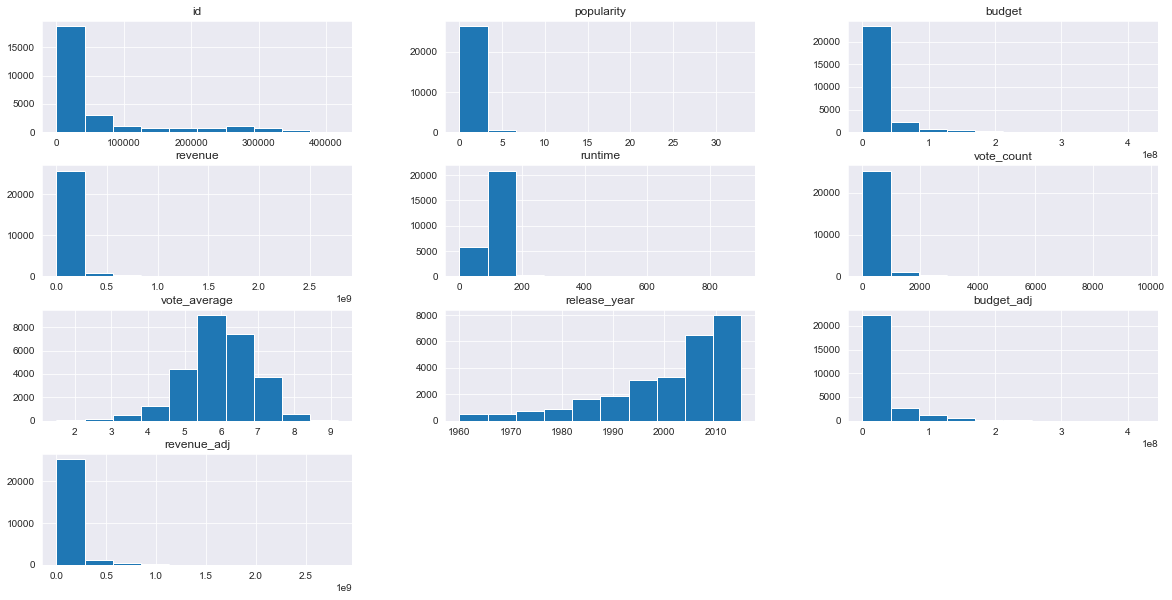

In [17]:
df_g.hist(figsize=(20,10));

It seems most of data are skewed to the right, such as the popularity. The release year is the only one obviously skewed to the left.

In [18]:
#Check the range of year in dataset
df_g['release_year'].min(),df_g['release_year'].max(),df_g['release_year'].mean()

(1960, 2015, 2000.7017940544147)

In [19]:
#Check the range of popularity
df_g['popularity'].min(),df_g['popularity'].max(),df_g['popularity'].mean()

(6.500000000000001e-05, 32.985763, 0.7056529185632799)

Let's take the 2000 as the seperator for years.

In [20]:
before2000 = df_g.query('release_year <2000')
from2000 = df_g.query('release_year >=2000')

In [21]:
#get avearge popularity of each genre
before2000_pop = before2000.groupby(['genres']).popularity.mean()
before2000_pop

genres
Action             0.671292
Adventure          0.799194
Animation          0.840274
Comedy             0.514991
Crime              0.635753
Documentary        0.184218
Drama              0.516938
Family             0.641922
Fantasy            0.669325
Foreign            0.195651
History            0.485108
Horror             0.441241
Music              0.453876
Mystery            0.544884
Romance            0.502480
Science Fiction    0.735432
TV Movie           0.263645
Thriller           0.627797
War                0.556110
Western            0.384276
Name: popularity, dtype: float64

In [22]:
from2000_pop = from2000.groupby(['genres']).popularity.mean()
from2000_pop

genres
Action             1.088218
Adventure          1.392718
Animation          0.855435
Comedy             0.638016
Crime              0.819388
Documentary        0.181129
Drama              0.632613
Family             0.871835
Fantasy            1.206172
Foreign            0.189908
History            0.641482
Horror             0.477930
Music              0.506158
Mystery            0.779055
Romance            0.644779
Science Fiction    1.180406
TV Movie           0.273032
Thriller           0.798270
War                0.858886
Western            1.014758
Name: popularity, dtype: float64

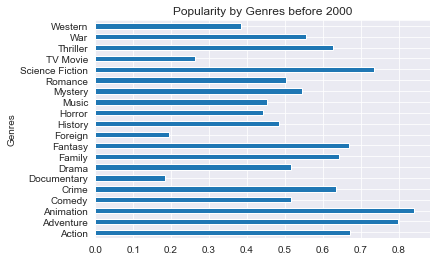

In [23]:
before2000_pop.plot.barh(title="Popularity by Genres before 2000",xlabel="Genres",ylabel="Popularity");

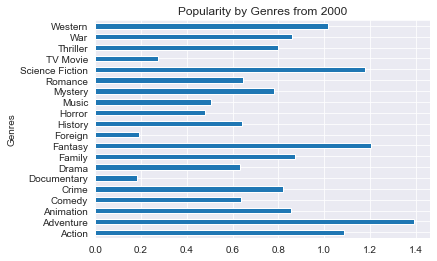

In [24]:
from2000_pop.plot.barh(title="Popularity by Genres from 2000",xlabel="Genres",ylabel="Popularity");

### Observations:
From above we can found that Animation, Adventure and Science Fiction are top 3 popularity movie genres, and it have change to Adventure, Fantasy and Science Fiction. It seems both Adventure and Science Fiction are cosistently on top 3 list.

</a> We need to deeper exploring on them to see is the most popular from year to year. Let's take a look on the popularity of Adventure and Science Fiction since 2000.

In [25]:
adventure_from2000 = from2000.query('genres == "Adventure"')
science_from2000 = from2000.query('genres == "Science Fiction"')

In [26]:
adventure_pop = adventure_from2000.groupby(['release_year']).popularity.mean()
adventure_pop

release_year
2000    0.854593
2001    1.106601
2002    1.101468
2003    1.291358
2004    1.100657
2005    1.040306
2006    0.942364
2007    0.853849
2008    1.008385
2009    1.138422
2010    1.360319
2011    1.129488
2012    1.461478
2013    1.260832
2014    2.430526
2015    3.283786
Name: popularity, dtype: float64

In [27]:
science_pop = science_from2000.groupby(['release_year']).popularity.mean()
science_pop

release_year
2000    0.571425
2001    0.687523
2002    1.077503
2003    0.766101
2004    1.117086
2005    0.967445
2006    0.794857
2007    0.614860
2008    0.773737
2009    0.989581
2010    0.827193
2011    0.968919
2012    0.938209
2013    1.243859
2014    2.294452
2015    2.245603
Name: popularity, dtype: float64

In [28]:
release_year = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
         '2012', '2013', '2014', '2015']

In [29]:
ind = np.arange(len(adventure_pop))
width = 0.4     # the width of the bars

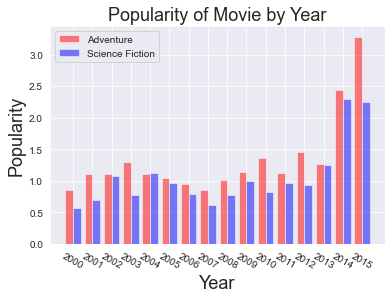

In [30]:
plt.bar(ind, adventure_pop, width, alpha=.5, color='r', label ='Adventure')
plt.bar(ind+width, science_pop, width, alpha=.5, color='b', label ='Science Fiction')
locations = ind + width / 2  # xtick locations
  # xtick labels
plt.xticks(locations, release_year, rotation=-30)
plt.title('Popularity of Movie by Year',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Popularity',fontsize=18)

plt.legend(loc='upper left');

#### Observations:
Compare to Science Fiction movie, Adventure is the most popular genre since 2000, except 2004.

### Research Question 2  - What kinds of properties are associated with movies that have high revenues?

Let's check whether the revenue is increased by year or movie amount. Also take the data since 2000 to exploring.

In [31]:
from2000_r = from2000.groupby('release_year').revenue.mean()
from2000_r

release_year
2000    4.892243e+07
2001    6.491983e+07
2002    5.952885e+07
2003    5.799616e+07
2004    6.321632e+07
2005    5.153491e+07
2006    4.568114e+07
2007    5.366436e+07
2008    4.416514e+07
2009    5.282713e+07
2010    5.383728e+07
2011    5.488428e+07
2012    5.630934e+07
2013    5.108113e+07
2014    4.898680e+07
2015    5.919313e+07
Name: revenue, dtype: float64

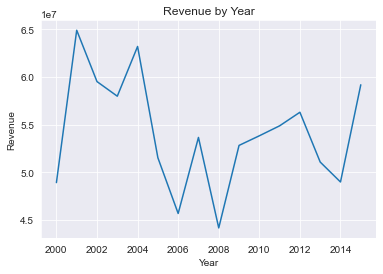

In [52]:
from2000_r.plot(title="Revenue by Year",xlabel="Year",ylabel="Revenue");

In [33]:
from2000_amt = from2000['release_year'].value_counts()

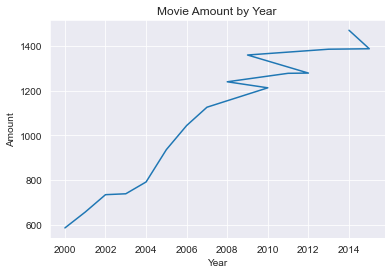

In [53]:
from2000_amt.plot(title="Movie Amount by Year",xlabel="Year",ylabel="Amount");

#### Observations:
The revenue of movies released between 2001 to 2004 are competitively higher than others. The amount of movies with increase trend by year. Both release year of movie and the movie amount are not effect the revenue.

*Will the genres effect revenue?*

In [35]:
r_genre = df_g.groupby('genres').revenue.mean()
r_genre

genres
Action             7.279473e+07
Adventure          1.131379e+08
Animation          7.525606e+07
Comedy             3.752624e+07
Crime              4.236866e+07
Documentary        2.041107e+06
Drama              2.923226e+07
Family             7.243318e+07
Fantasy            9.631366e+07
Foreign            1.520460e+06
History            3.201179e+07
Horror             1.682281e+07
Music              2.857177e+07
Mystery            4.021757e+07
Romance            3.569197e+07
Science Fiction    7.014056e+07
TV Movie           2.514970e+05
Thriller           4.172842e+07
War                4.760518e+07
Western            2.856871e+07
Name: revenue, dtype: float64

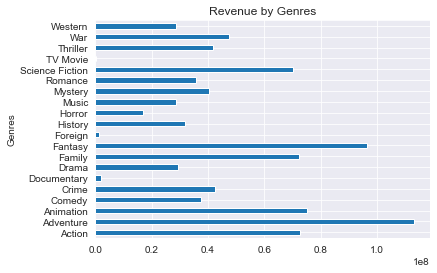

In [36]:
r_genre.plot.barh(title="Revenue by Genres",xlabel="Genres",ylabel="Revenue");

#### Observations:
The top 3 genres with highest revenue are Adventure, Fantasy and Science Fiction, which also are the top 3 popular genres since 2000 basis on question one.
</a> Which means, the more popular genre have higher revenue.

*Will the popularity of director have positive relation with the revenue?*

Same as genre column, director column contain multiple values separated by pipe (|) characters, lets also take the first value in it as key words for analysis.

In [37]:
def splitbysepaddnewrows(dataframe,column_name,seperator):
    dataframe[column_name] = dataframe[column_name].str.split(seperator)
    return dataframe.explode(column_name)

In [38]:
director_df = splitbysepaddnewrows(from2000.copy(),'director','|')

Firstly, let's find the top 10 popular directors

In [39]:
top_director_pop = director_df.groupby('director').popularity.mean().to_frame().sort_values(ascending=False,by=['popularity']).head(10)

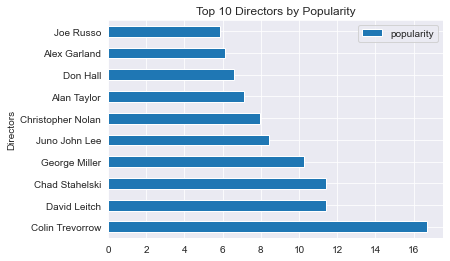

In [40]:
top_director_pop.plot.barh(title="Top 10 Directors by Popularity",xlabel="Directors",ylabel="Popularity");

Then, will the top 10 director by revenue be same as above

In [41]:
top_director_rev = director_df.groupby('director').revenue.mean().to_frame().sort_values(ascending=False,by=['revenue']).head(10)

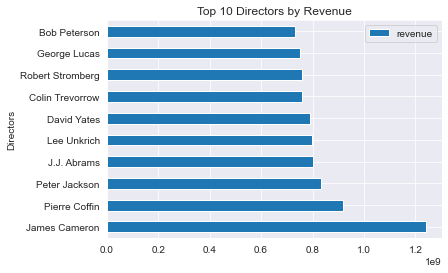

In [42]:
top_director_rev.plot.barh(title="Top 10 Directors by Revenue",xlabel="Directors",ylabel="Revenue");

It seems most of them are differnt on two top 10 list. Let's further expolring on the director with the highest revenue, James Carmeron.

In [43]:
james_movies = director_df.query('director == "James Cameron"')

What kind of genre he directed most?

In [44]:
james_g_rev = james_movies.groupby('genres').revenue.mean()

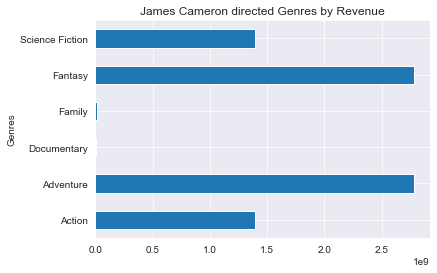

In [45]:
james_g_rev.plot.barh(title="James Cameron directed Genres by Revenue",xlabel="Genres",ylabel="Revenue");

The Adventure movie appears again, which is the most popular per to Q1 analysis. Let's see what we can find among director, revenue and popularity in Adventure movie.

In [46]:
director_df_adv = director_df.query('genres == "Adventure"')

In [47]:
top_adv_director_rev = director_df_adv.groupby('director').revenue.mean().to_frame().sort_values(ascending=False,by=['revenue']).head(10)

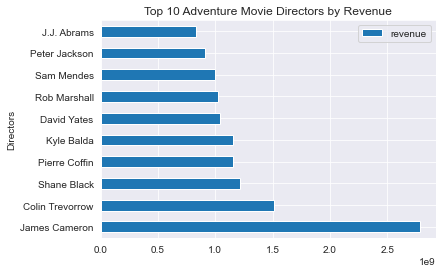

In [48]:
top_adv_director_rev.plot.barh(title="Top 10 Adventure Movie Directors by Revenue",xlabel="Directors",ylabel="Revenue");

In [49]:
top_adv_director_pop = director_df_adv.groupby('director').popularity.mean().to_frame().sort_values(ascending=False,by=['popularity']).head(10)

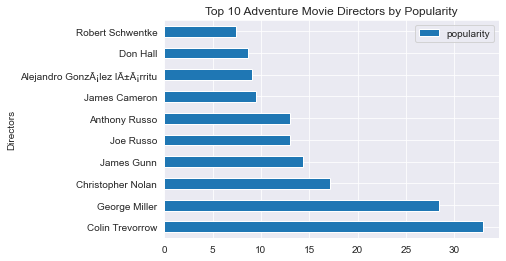

In [50]:
top_adv_director_pop.plot.barh(title="Top 10 Adventure Movie Directors by Popularity",xlabel="Directors",ylabel="Popularity");

### Observations:
* Colin Trvorrow is the most popular director since 2000.
* James Carmeron has the highest average revenue since 2000.
* Both Adventure and Fantasy with higher revenue in movies directed by James Carmeron.
* James Carmeron and Colin Trevorrow are top 2 Adventure movie directors by revenue.

<a id='conclusions'></a>
## Conclusions

*Per to above analysis, Adventure movie is the most popular genre from year to year and with high revenue. The more popular genre will make more revenue, and the director of popular genres are get higher popularity. But not all popular director with popular genre can have higher revenue.As I only take the first genre/director splited from genres/directors column for each row, it may cannot include all data for each genre/director in my analysis.*

**Limitations:**
* Still have null values in cleaned data set, such as 23 null values in genres, which is can't be fill by mean value. 
* Both vote count and vote avg columns are lack of defination information.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0